In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json
from scipy.spatial import Delaunay

def generate_planar_graph(num_nodes=50, width=100, height=100, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Step 1: Place random points (node positions)
    points = np.random.rand(num_nodes, 2) * [width, height]

    # Step 2: Compute Delaunay triangulation (planar edges)
    tri = Delaunay(points)
    edges = set()
    for simplex in tri.simplices:
        for i in range(3):
            edge = tuple(sorted((int(simplex[i]), int(simplex[(i+1) % 3]))))
            edges.add(edge)

    # Step 3: Build graph
    G = nx.Graph()
    for i, (x, y) in enumerate(points):
        G.add_node(int(i), pos=(float(x), float(y)))
    for u, v in edges:
        dist = float(np.linalg.norm(points[u] - points[v]))
        G.add_edge(int(u), int(v), weight=dist)

    return G

def save_city(G, filename="city.json"):
    data = {
        "nodes": {int(n): {"pos": [float(G.nodes[n]['pos'][0]), float(G.nodes[n]['pos'][1])]} 
                  for n in G.nodes()},
        "edges": [
            {"u": int(u), "v": int(v), "weight": float(G.edges[u, v]['weight'])} 
            for u, v in G.edges()
        ]
    }
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)
    print(f"City saved to {filename}")

def load_city(filename="city.json"):
    with open(filename, "r") as f:
        data = json.load(f)

    G = nx.Graph()
    for n, attr in data["nodes"].items():
        G.add_node(int(n), pos=tuple(attr["pos"]))
    for edge in data["edges"]:
        G.add_edge(int(edge["u"]), int(edge["v"]), weight=float(edge["weight"]))
    return G

def draw_graph(G):
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_size=20, node_color="blue", edge_color="gray", with_labels=False)
    plt.show()


In [38]:
# Step 1: Generate a new city
G = generate_planar_graph(num_nodes=1000)

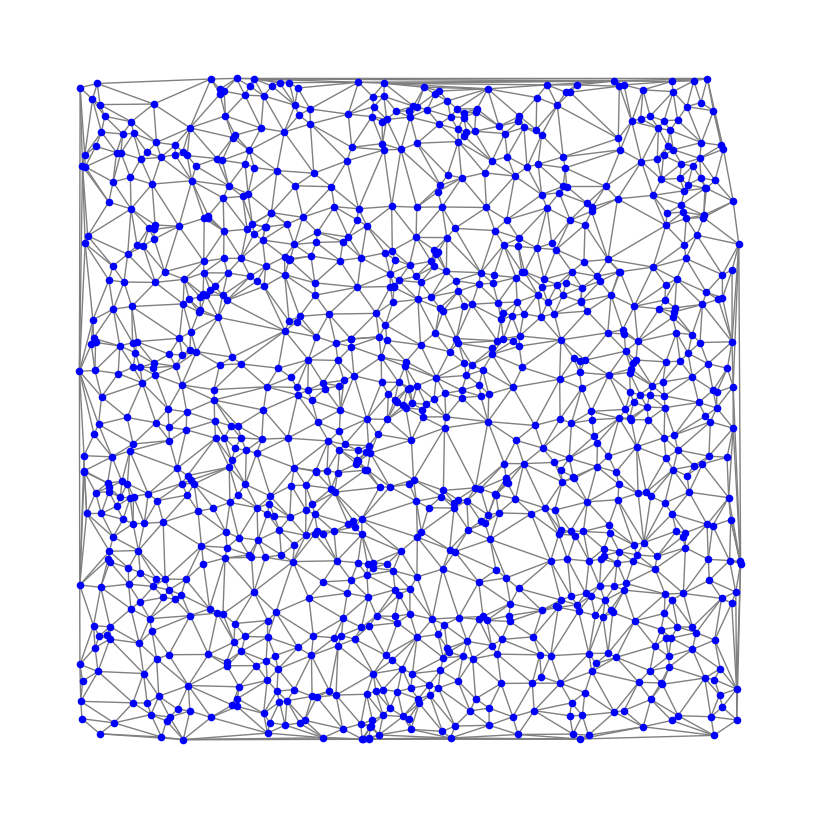

In [39]:
# Step 2: Preview it
draw_graph(G)

In [40]:
# Step 3: If you like it, save it
save_city(G, "city.json")

City saved to city.json


In [ ]:
# Step 4: Later, load it again
G2 = load_city("city.json")
draw_graph(G2